In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

In [2]:
cols = [
    'Country',
    'Quality of Life Index',
    'Purchasing Power Index',
    'Safety Index',
    'Health Care Index',
    'Cost of Living Index',
    'Property Price to Income Ratio',
    'Traffic Commute Time Index',
    'Pollution Index',
    'Climate Index',
]

data = pd.read_csv('country_data.csv', '\t', header=None).set_index(0)
data.columns = cols

In [37]:
def quartilise(data, col):
    q = list(data[col].quantile([0.25, 0.5, 0.75]))
    col_q = data[col]
    col_q = ['low' if c <= q[0] 
             else 'medium_low' if c <= q[1] 
             else 'medium_high' if c <= q[2] 
             else 'high' 
             for c in col_q]
    
    return col_q

In [38]:
def properties(key):
    return {'color': '#ff8b8b' if key[1] == 'high' 
            else '#f5ffa2' if key[1] == 'medium_high' 
            else '#aaffa2' if key[1] == 'medium_low'
            else '#9fd1ff'}

/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/home/aga/.virtualenvs/visard/li

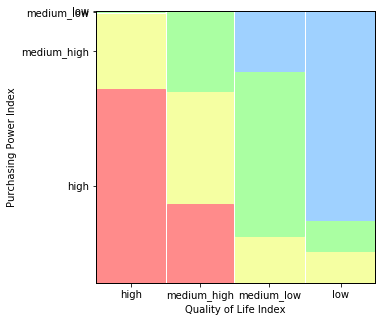

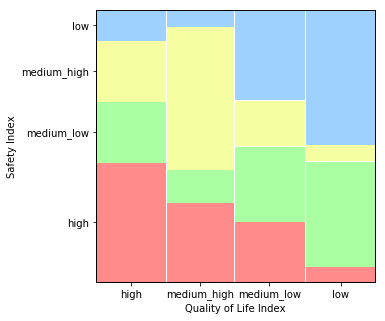

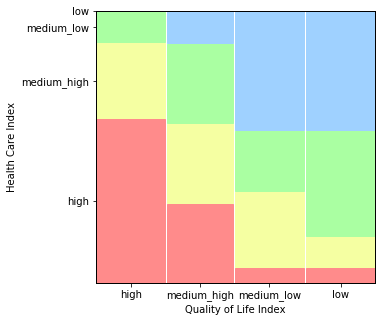

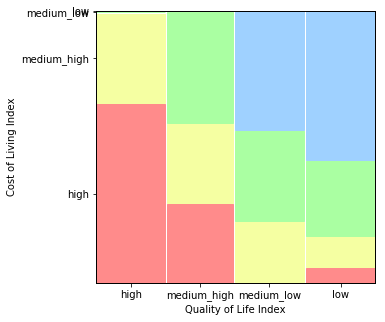

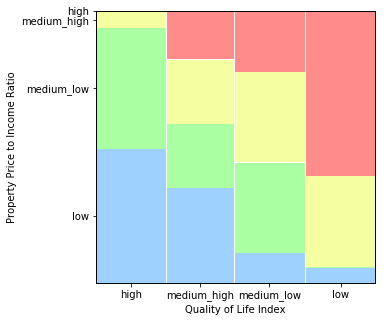

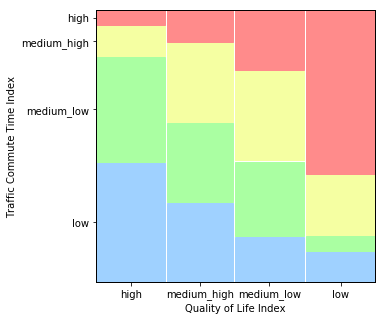

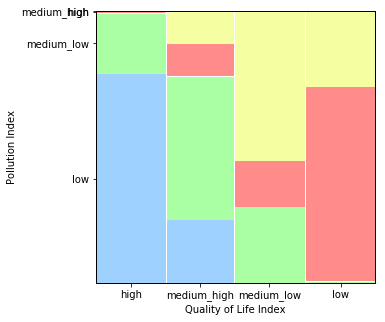

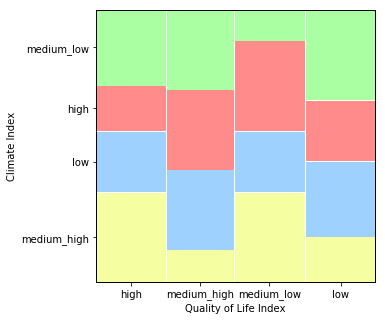

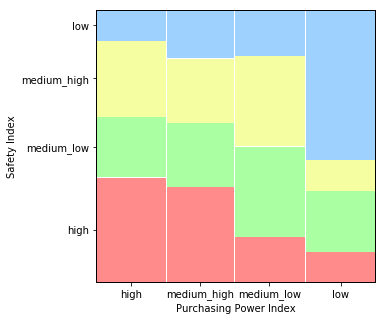

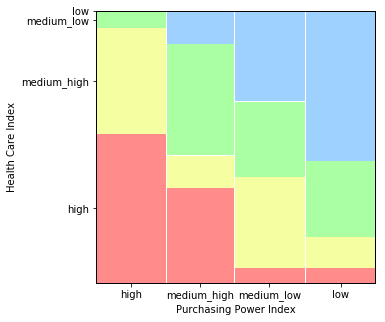

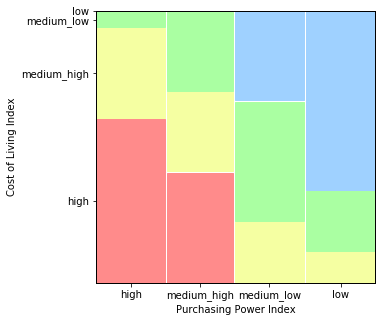

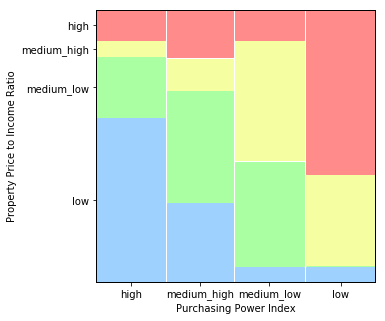

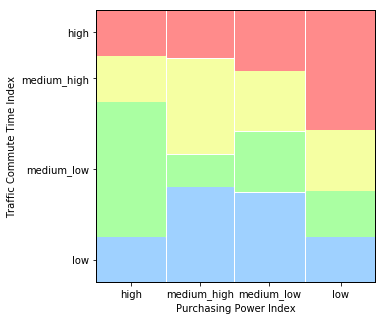

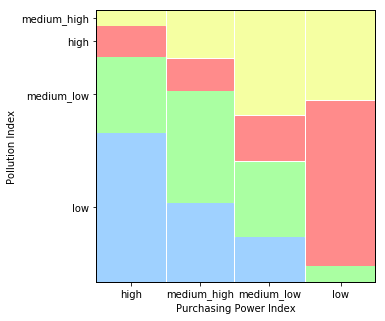

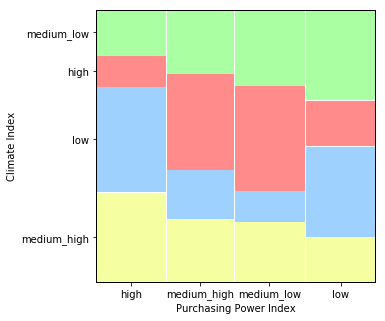

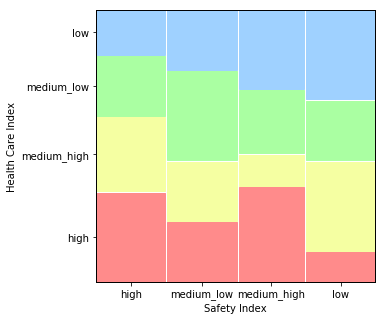

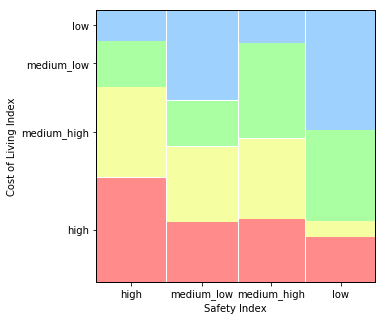

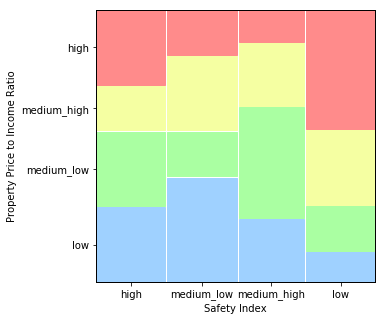

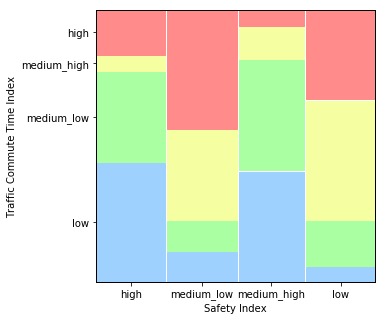

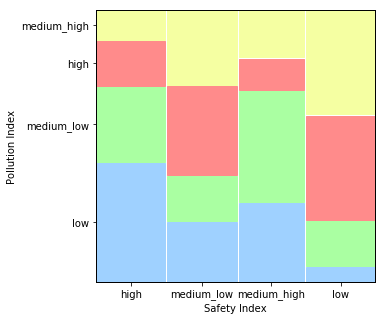

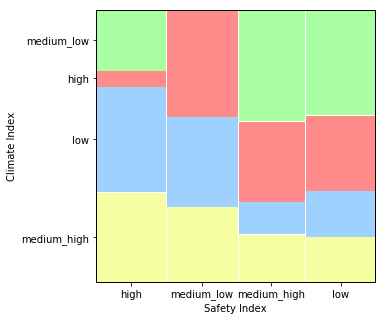

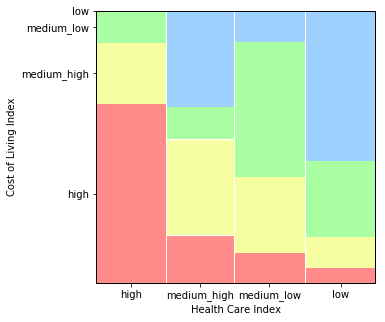

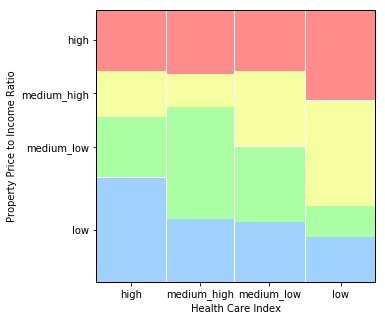

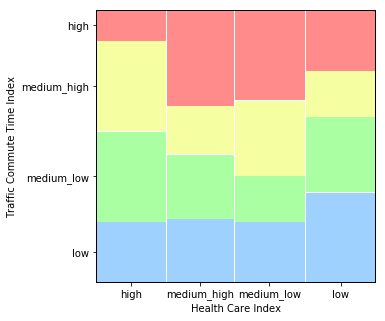

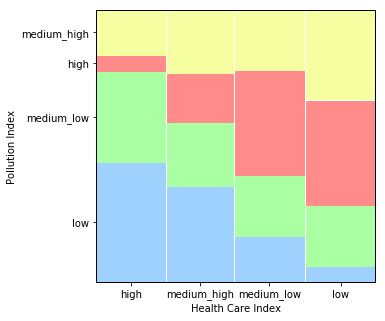

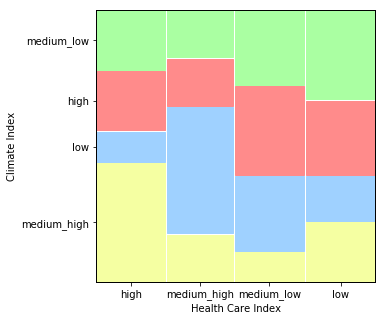

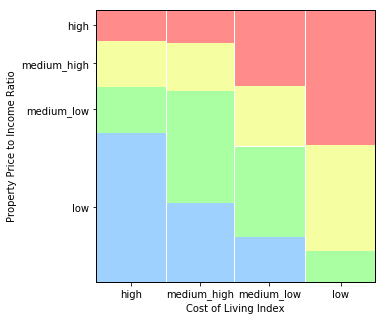

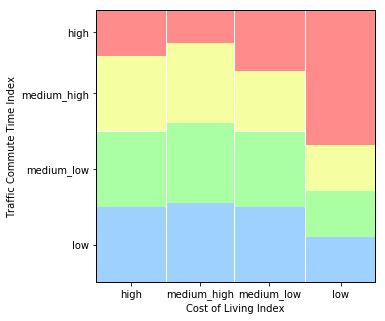

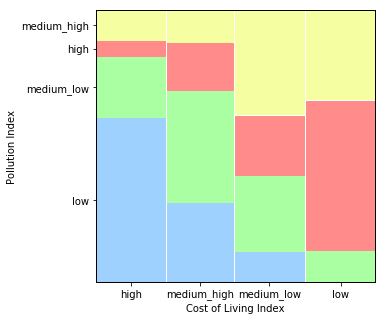

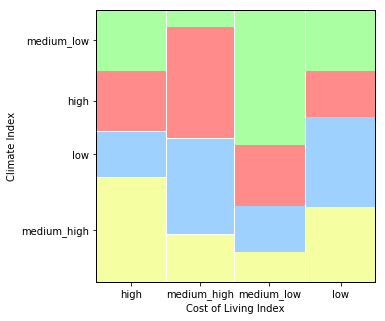

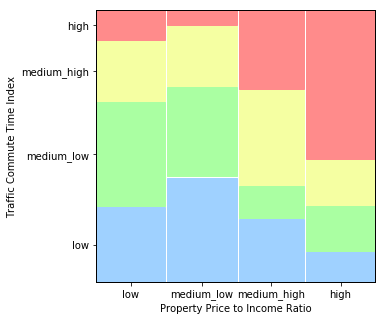

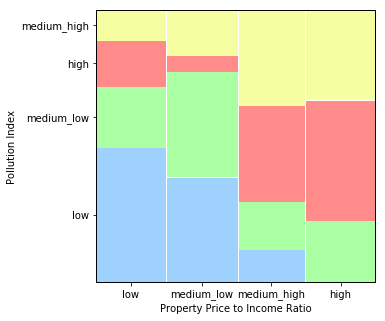

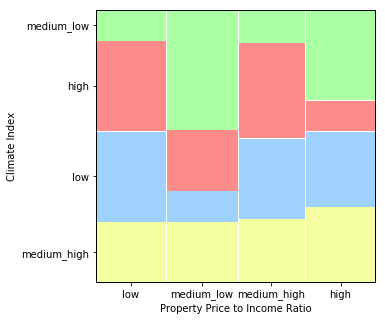

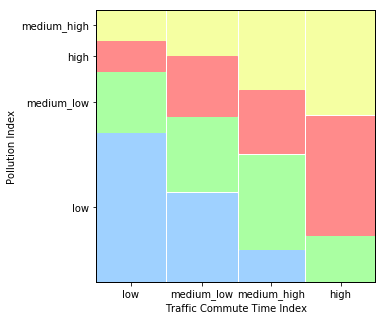

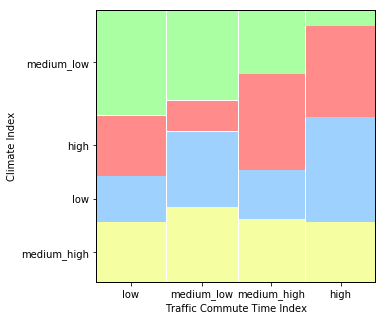

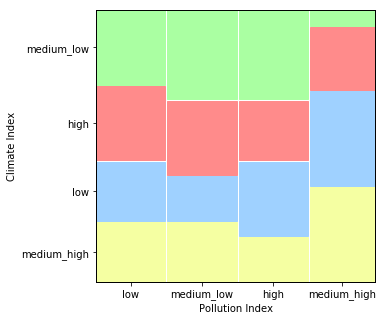

In [41]:
for i, col1 in enumerate(cols[1:]):
    col1_q = quartilise(data, col1)
    for col2 in cols[i+1:]:
        if col1 != col2:
            col2_q = quartilise(data, col2)
            data_tmp = pd.DataFrame({col1: col1_q, col2: col2_q})
#             data_tmp.sort_values(col2, inplace=True)
#             data_tmp.sort_values(col1, inplace=True)
#             data_tmp.sort_values(col1_q)
            fig, ax = plt.subplots()
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            fig, rects = mosaic(data_tmp, [col1, col2], ax=ax, labelizer=lambda x: None,
                                axes_label=True, gap=0.007, properties=properties)
            fig.set_size_inches(5, 5)
            plt.savefig(col1 + '_' + col2 + '.png')
            fig.show()
#             break

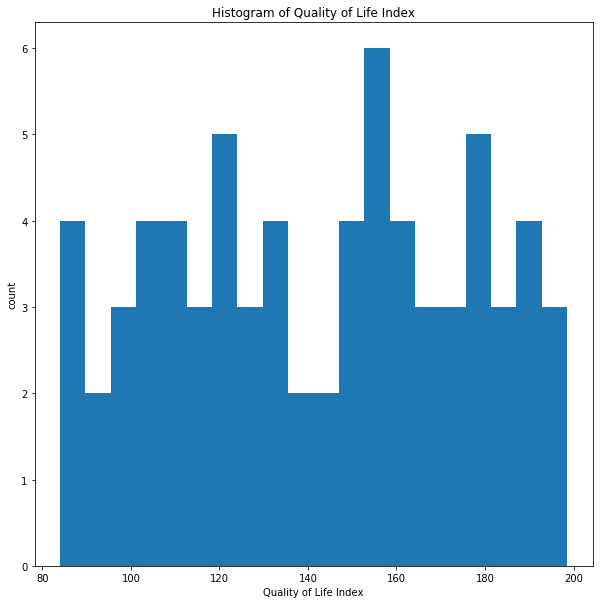

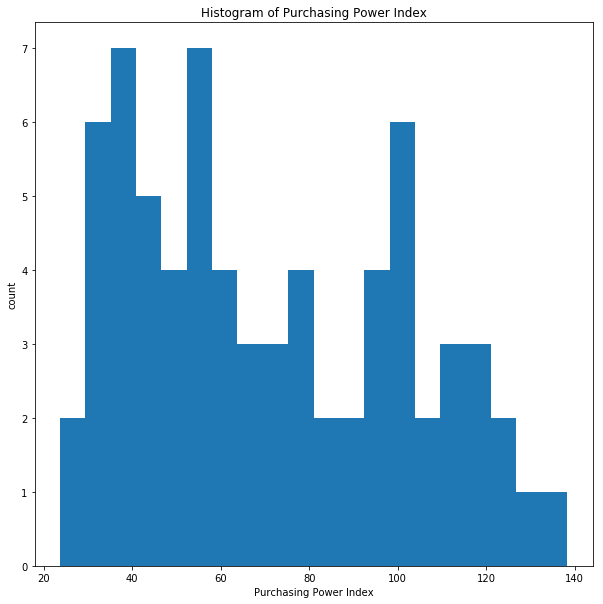

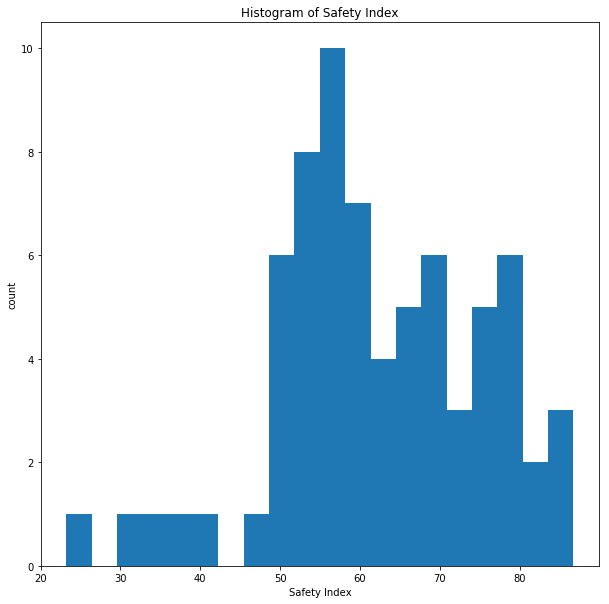

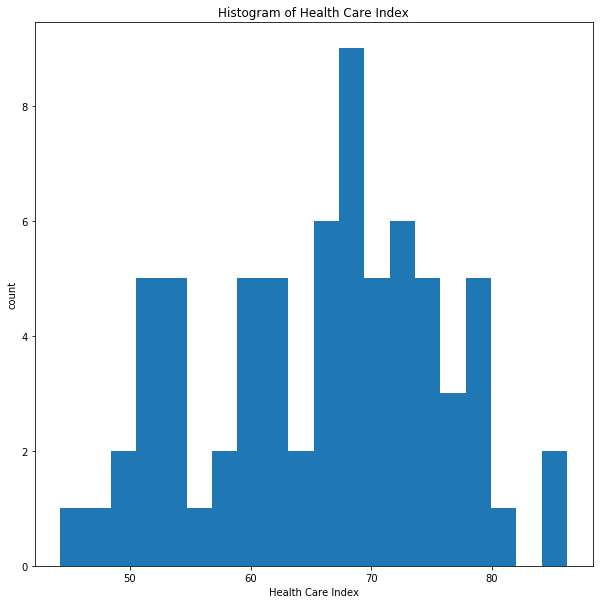

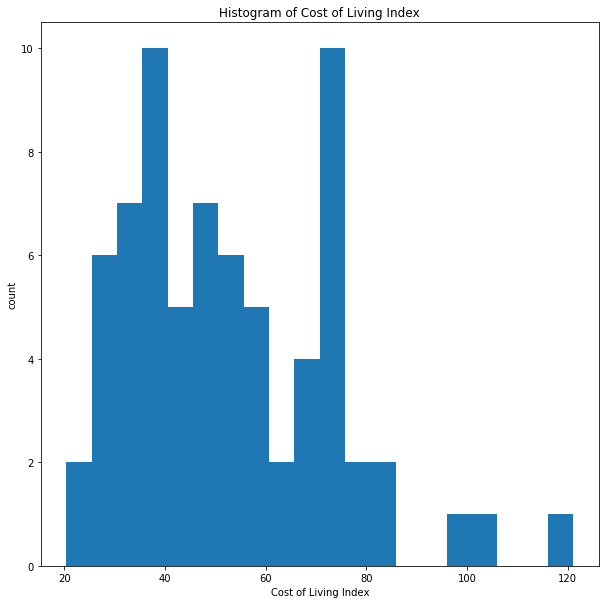

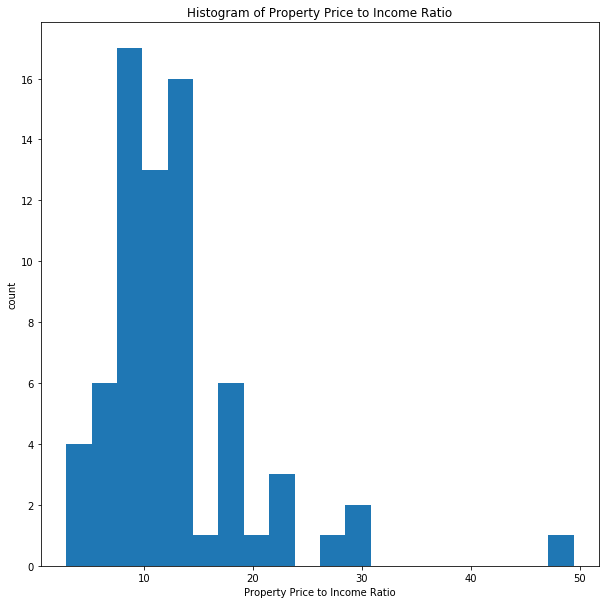

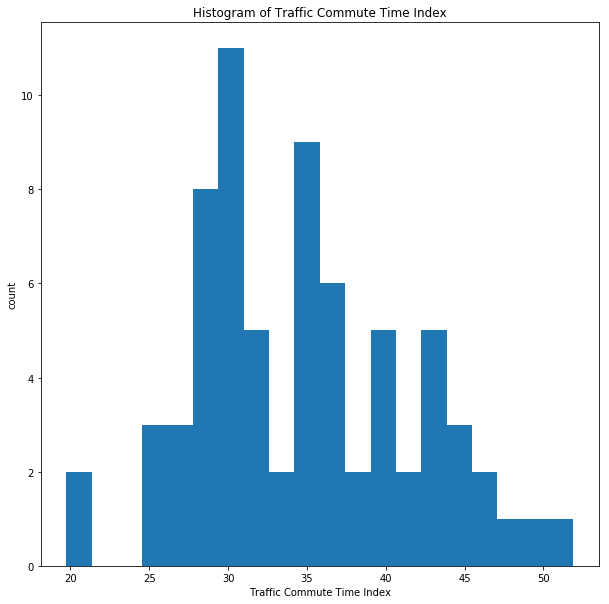

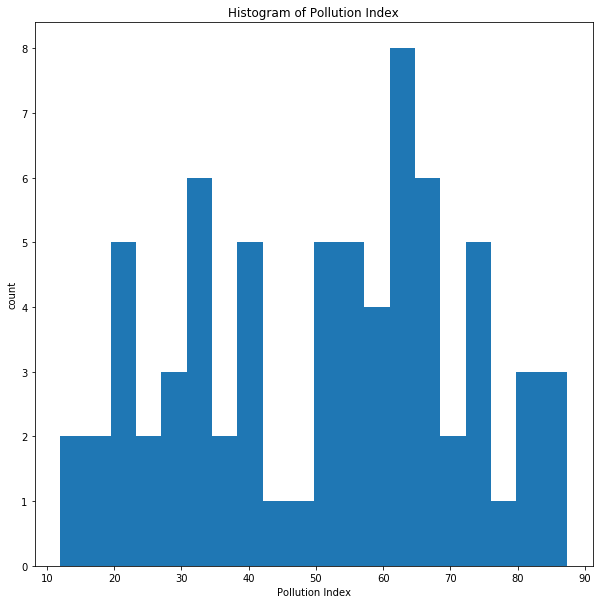

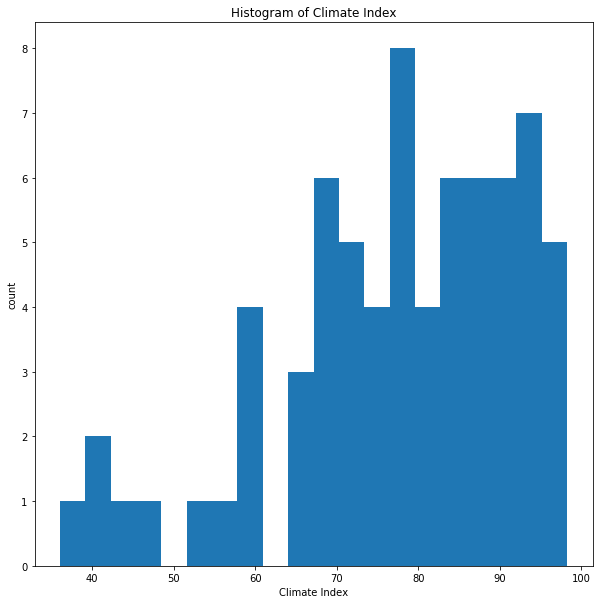

In [36]:
for col in cols[1:]:
    plt.figure(figsize=(10, 10))
    plt.hist(data[col], bins=20)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of ' + col)
    plt.savefig(col, dpi=100)
    plt.show()